In [1]:
import pandas as pd
import numpy as np

In [2]:
# loading the same dataset as in previous notebook
cic_df = pd.read_csv(
    "../datasets/raw/CICIDS2017/Monday-WorkingHours.pcap_ISCX.csv"
)


In [3]:
#FIxing column names
cic_df.columns = cic_df.columns.str.strip()

In [4]:
# verifying
print(cic_df.columns)

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [7]:
# checking missing values
cic_df.replace([np.inf, -np.inf], np.nan, inplace=True)
cic_df.isnull().sum().sort_values(ascending=False).head(10)

Flow Bytes/s                   437
Flow Packets/s                 437
Flow Duration                    0
Total Backward Packets           0
Total Length of Fwd Packets      0
Total Length of Bwd Packets      0
Destination Port                 0
Fwd Packet Length Max            0
Fwd Packet Length Min            0
Fwd Packet Length Std            0
dtype: int64

In [8]:
cic_df.dropna(inplace=True)

Before dropping

In [9]:
cic_df.shape

(529481, 79)

After dropping

In [10]:
# separating features and labels
X = cic_df.drop("Label", axis=1)
y = cic_df["Label"]

In [11]:
X.shape, y.shape

((529481, 78), (529481,))

In [12]:
#Encoding labels, benign as 0 and attack as 1
y_binary = y.apply(lambda x: 0 if x == "BENIGN" else 1)
y_binary.value_counts()

Label
0    529481
Name: count, dtype: int64

Feature Scaling, Isolation Forest, SVM and Random Forest need numeric consistency

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape

(529481, 78)

Saving the preprocessed data
It is necessary for
- reproducibility
- Github cleanliness
- Faster training later

In [15]:
pd.DataFrame(X_scaled).to_csv(
    "../datasets/preprocessed/cicids_features_scaled.csv",
    index=False
)

pd.DataFrame(y_binary, columns=["Label"]).to_csv(
    "../datasets/preprocessed/cicids_labels.csv",
    index=False
)

Output:
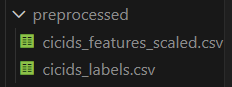